In [1]:
import tensorflow as tf
import numpy as np
import glob
import matplotlib.pyplot as plt

W0725 14:39:31.098698 139823474206528 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0725 14:39:31.109044 139823474206528 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


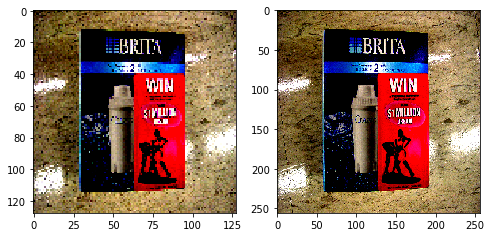

*************************


In [26]:
batch_size = 1
image_paths = sorted(glob.glob('/home/sid/hack/infilect_dataset/product_images/*.jpg'))
label_paths = sorted(glob.glob('/home/sid/hack/infilect_dataset/product_images/*.jpg'))

def load_image(image_path,label_path):
    image,label = tf.io.read_file(image_path),tf.io.read_file(label_path)
    image,label = tf.io.decode_jpeg(image,channels=3),tf.io.decode_jpeg(label,channels=3)
    image,label = tf.image.resize_images(image,[32*4,32*4]),tf.image.resize_images(label,[64*4,64*4])
    image,label = image/255.0,label/255.0
    image,label = tf.image.per_image_standardization(image),tf.image.per_image_standardization(label) 
    return image,label

dataset_image = tf.data.Dataset.from_tensor_slices(image_paths)
dataset_label = tf.data.Dataset.from_tensor_slices(label_paths)
dataset = tf.data.Dataset.zip((dataset_image,dataset_label))
dataset = dataset.map(load_image).batch(batch_size)
dataset = dataset.shuffle(buffer_size=int(300/batch_size))
dataset = dataset.repeat()
dataset = dataset.prefetch(buffer_size=int(300/batch_size))

iterator = tf.data.make_one_shot_iterator(dataset)
next_element = iterator.get_next()

sess = tf.InteractiveSession()
with tf.Graph().as_default():
    for epoch in range(1):
        fig = plt.figure(figsize=(8,8))
        
        for i in range(int(300/batch_size)):
            image,label = sess.run(next_element)
            image = np.reshape(image,newshape=(32*4,32*4,3))
            label = np.reshape(label,newshape=(64*4,64*4,3))
            #assert image.all() == label.all()
            #print(image,i+1)
            fig.add_subplot(1,2,1)
            plt.imshow(image)
            fig.add_subplot(1,2,2)
            plt.imshow(label)
            #plt.imshow(label)
            plt.show()
            break
        print("*************************")
sess.close()